In [1]:
pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [10]:
ticker = "AAPL"  # Apple stock
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
print(df.head())
df.tail()

/tmp/ipython-input-4008930288.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538528  72.598907  71.292319  71.545905  135480400
2020-01-03  71.833305  72.594071  71.608700  71.765682  146322800
2020-01-06  72.405701  72.444344  70.703034  70.954210  118387200
2020-01-07  72.065140  72.671333  71.845362  72.415330  108872000
2020-01-08  73.224411  73.526303  71.768086  71.768086  132079200


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.367020,254.745665,252.553450,253.868788,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500


In [11]:
# Prepare data for prediction

# Features
X = df[['Open', 'High', 'Low', 'Volume']]

#Next day's Close
y = df['Close'].shift(-1)  # Shift up by 1 so today's X predicts tomorrow's Close

# Drop last row (it has NaN target because of the shift)
X = X[:-1]
y = y[:-1]

print(X.head())
print(y.head())

Price            Open       High        Low     Volume
Ticker           AAPL       AAPL       AAPL       AAPL
Date                                                  
2020-01-02  71.545905  72.598907  71.292319  135480400
2020-01-03  71.765682  72.594071  71.608700  146322800
2020-01-06  70.954210  72.444344  70.703034  118387200
2020-01-07  72.415330  72.671333  71.845362  108872000
2020-01-08  71.768086  73.526303  71.768086  132079200
Ticker           AAPL
Date                 
2020-01-02  71.833305
2020-01-03  72.405701
2020-01-06  72.065140
2020-01-07  73.224411
2020-01-08  74.779747


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 1004
Testing samples: 252


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[[192.283005  ]
 [190.83772146]
 [183.71199262]
 [183.54825741]
 [180.47341326]
 [179.62630218]
 [183.0732994 ]
 [182.50647036]
 [184.32942986]
 [182.81789376]]


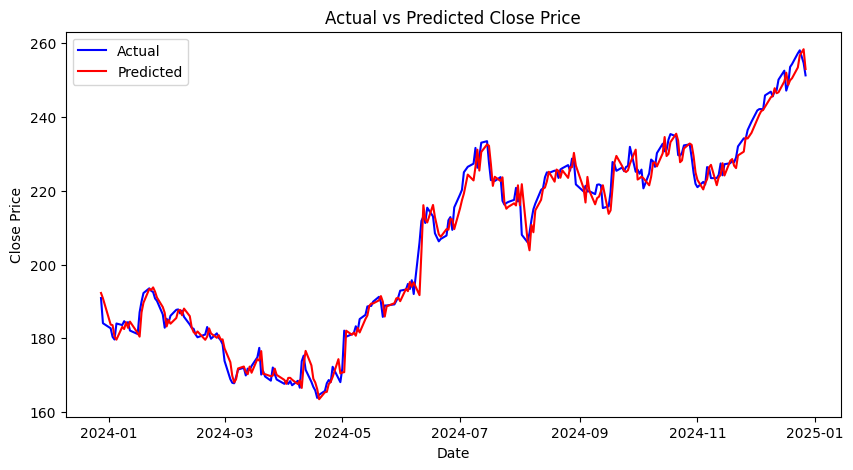

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)

R² Score: 0.9850927355593265
Mean Absolute Error: 2.337285771875338


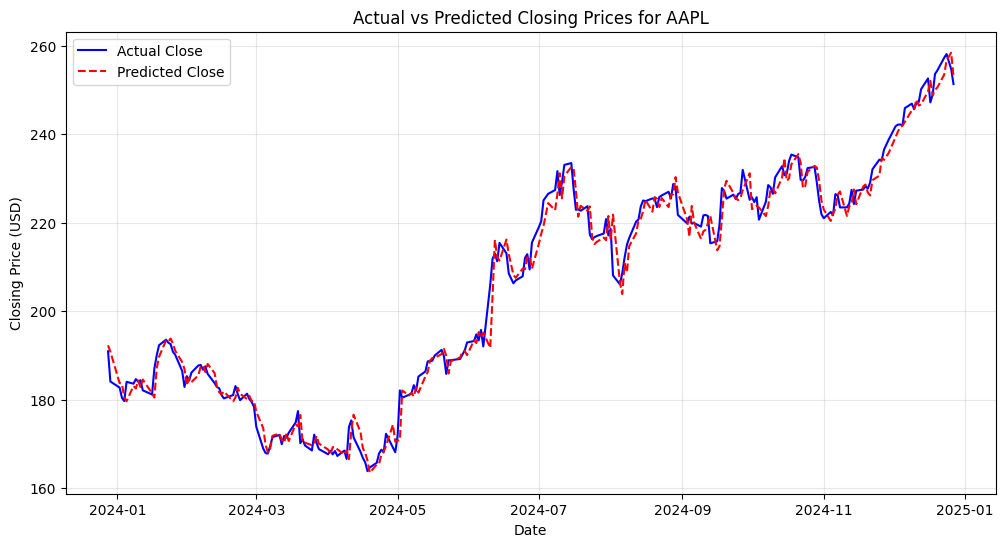

R² Score: 0.9851
Mean Absolute Error: 2.34 USD

Interpretation:
- The model explains 98.51% of the variation in closing prices.
- The average prediction error is 2.34 USD, which is very low for XAUUSD.
- The predicted and actual price lines are closely aligned, indicating strong predictive accuracy.


In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Close", color='red', linestyle='--')
plt.title(f"Actual vs Predicted Closing Prices for {ticker}")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f} USD")
print("\nInterpretation:")
print(f"- The model explains {r2*100:.2f}% of the variation in closing prices.")
print(f"- The average prediction error is {mae:.2f} USD, which is very low for XAUUSD.")
print("- The predicted and actual price lines are closely aligned, indicating strong predictive accuracy.")


In [24]:
y_pred_flat = y_pred.flatten()

In [27]:
results = pd.DataFrame({
    'Date': y_test.index,
    'Actual_Close': y_test.values.flatten(),
    'Predicted_Close': y_pred_flat
})

In [28]:
results.to_csv('predicted_vs_actual.csv', index=False)